In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df=pd.read_csv('/drive/My Drive/Datasets/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape


(205, 26)

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning and Preparation

In [9]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [10]:
l=[]
for i in df['CarName']:
  x=i.split(' ')
  l.append(x[0])


In [11]:
Companyname = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName', Companyname)

In [12]:
df = df.drop('CarName', axis=1)

In [13]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
df['CompanyName'] = df['CompanyName'].str.lower()

In [15]:
def replace_name(a,b):
  df['CompanyName'] = df['CompanyName'].replace(a,b)


In [16]:
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')


In [17]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [18]:
df=df.drop('car_ID', axis=1)

In [19]:
Colc = []
for c in df.columns:
  if df[c].dtypes =='object':
    Colc.append(c)
  else:
    continue
Colc


['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [20]:
Coln = []
for c in df.columns:
  if df[c].dtypes !='object':
    Coln.append(c)
  else:
    continue
Coln

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

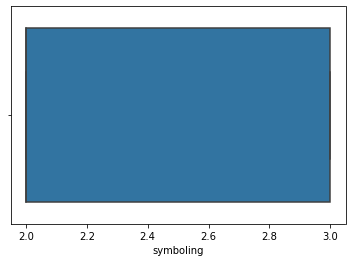

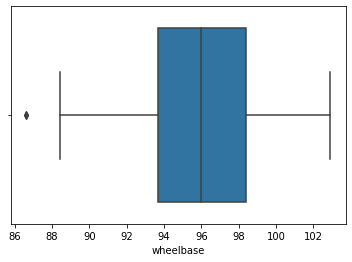

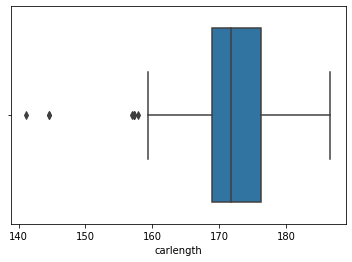

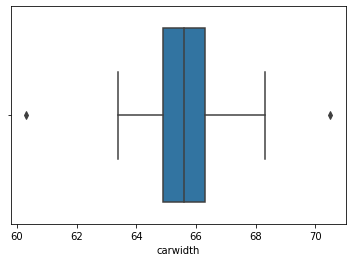

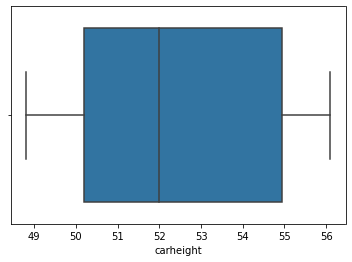

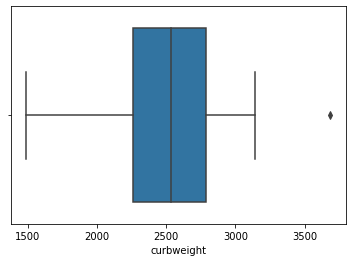

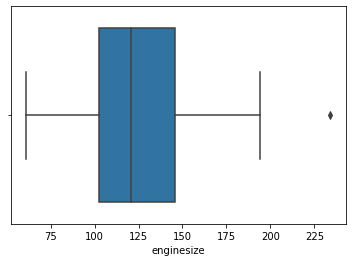

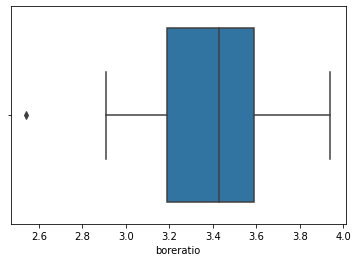

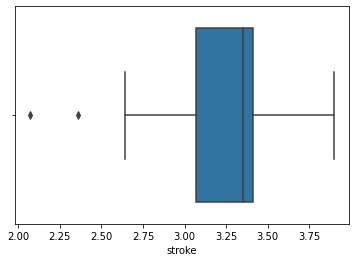

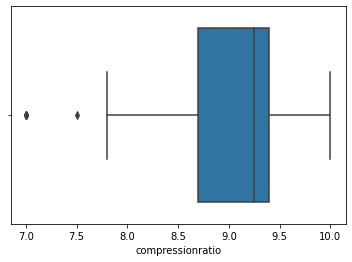

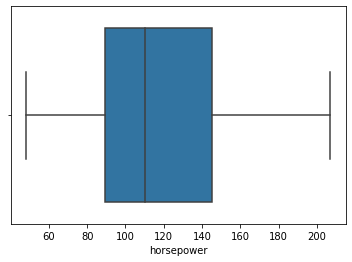

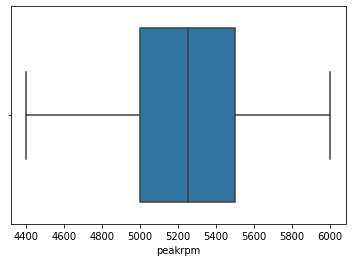

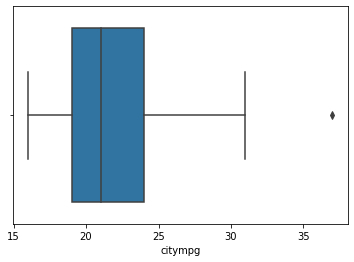

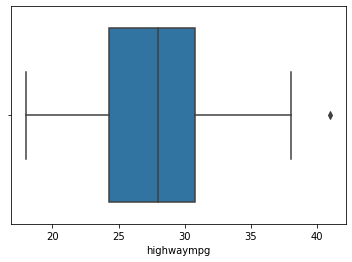

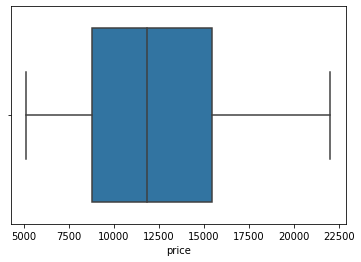

In [21]:
for c in Coln:
  
  q1=df[c].quantile(0.25)
  q3=df[c].quantile(0.75)
  IQR = q3-q1
  upper_limit = IQR + (1.5*q3)
  lower_limit = IQR - (1.5*q1)
  df=df[(df[c]<=upper_limit) & (df[c]>=lower_limit)]
  plt.figure()
  sns.boxplot(data=df, x=df[c])


In [22]:
df1 = df.corr()

<AxesSubplot:>

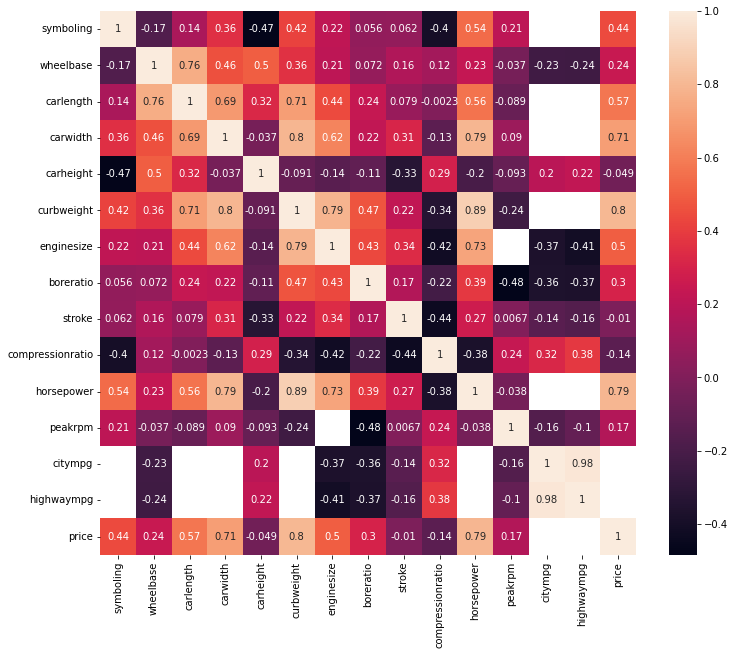

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(data = df1[(df1>0.5) | (df1> - 0.5)], annot =True)

<AxesSubplot:xlabel='carbody', ylabel='price'>

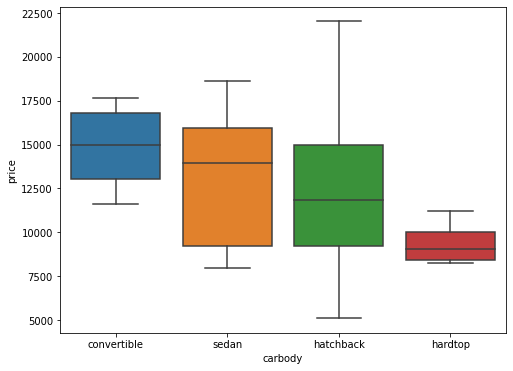

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='price', x='carbody')

<AxesSubplot:xlabel='doornumber', ylabel='price'>

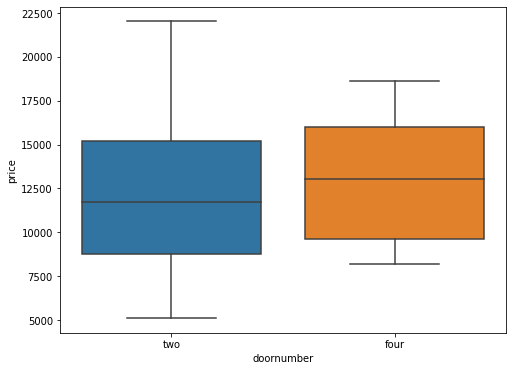

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='price', x='doornumber')

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

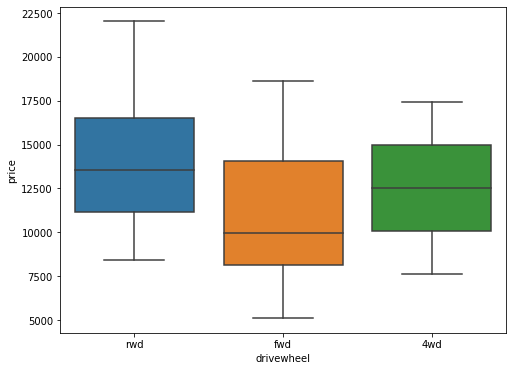

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='price', x='drivewheel')

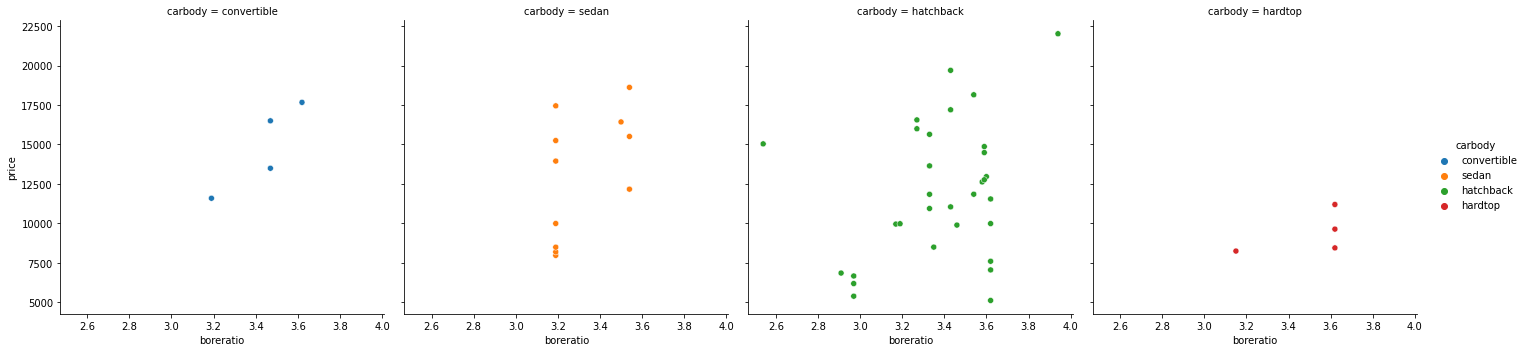

In [45]:
sns.relplot(data=df, x='boreratio', y='price', col='carbody', hue='carbody')

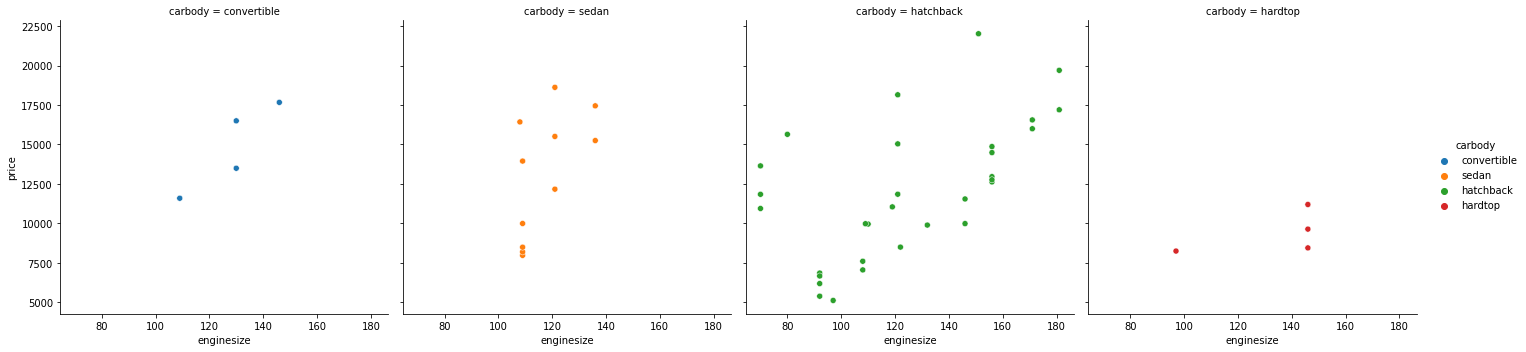

In [46]:
sns.relplot(data=df, x='enginesize', y='price', col='carbody', hue='carbody')

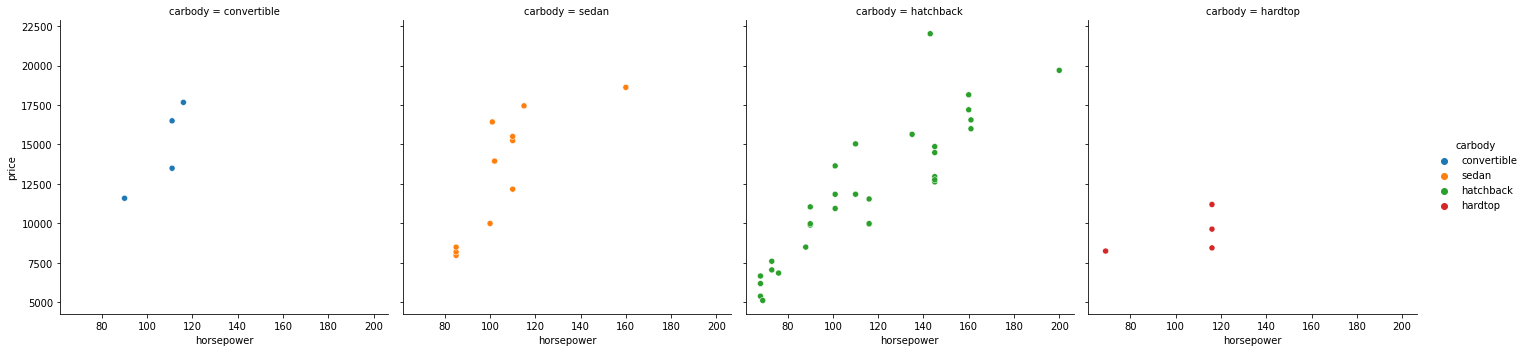

In [47]:
sns.relplot(data=df, x='horsepower', y='price', col='carbody', hue='carbody')

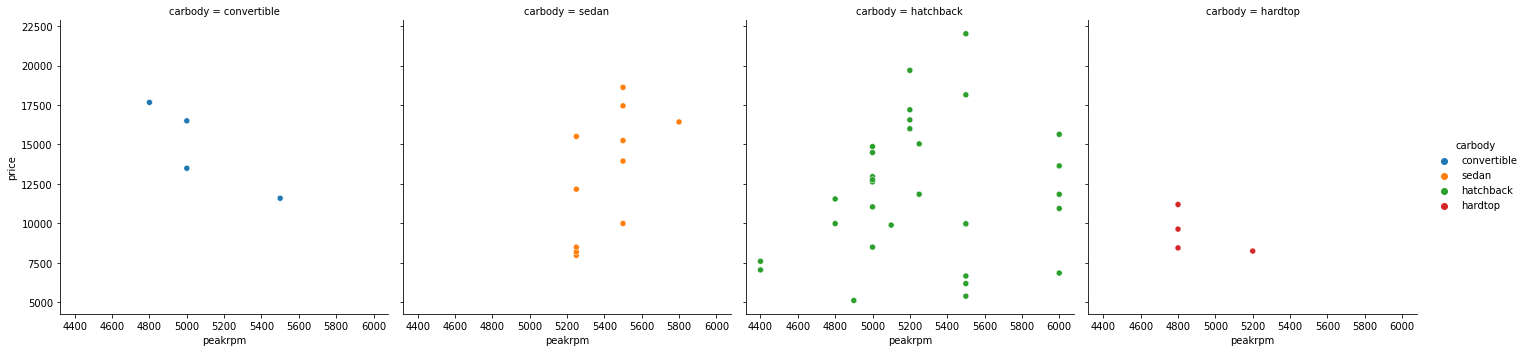

In [48]:
sns.relplot(data=df, x='peakrpm', y='price', col='carbody', hue='carbody')